In [151]:
import sklearn as sk
from sklearn.mixture import GaussianMixture
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import os

In [152]:
dir = '/Users/fionshiau/Documents/2023Spring/Computational_Genomics/Final_Project/comp-geno-proj/'

In [153]:
dat = pd.read_csv(os.path.join(dir,'data','merged','1.3.1_raw.csv'))

In [154]:
dat.iloc[0:5,:]

,Unnamed: 0,chr,start,end,HiC_AB,H3K4me2,H3K9Ac,H3K4me3,ATAC-seq,H3K4me1,H3K27Ac,H3K27me3,RNAPol
0,chr1_0-5000,chr1,0,5000,-0.017687,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.00000,0.000000
1,chr1_5000-10000,chr1,5000,10000,-0.018022,0.000000,0.000000,0.00000,0.596187,0.0,1.096350,0.00000,0.133207
2,chr1_10000-15000,chr1,10000,15000,-0.018439,0.765027,0.000000,0.16184,1.260333,0.0,0.822263,2.46605,2.244871
3,chr1_15000-20000,chr1,15000,20000,-0.015277,0.824867,1.115655,0.16184,0.084689,0.0,0.000000,0.00000,3.256657
4,chr1_20000-25000,chr1,20000,25000,-0.006933,0.000000,0.000000,0.00000,0.034956,0.0,0.000000,0.00000,0.000000


In [155]:
mat = dat.iloc[:,4:].to_numpy()

In [156]:
# normalize non-HiC column totals to 1e6
#mat[:,1:] = (mat[:,1:]/mat[:,1:].sum(axis=0))*1e6
# scale to range from 0 to 1 by min-max scaler
from sklearn.preprocessing import Normalizer
mat = np.hstack((mat[:,0].reshape(-1,1),Normalizer().fit_transform(X=mat[:,1:])))

In [157]:
gm = GaussianMixture(n_components = 11, random_state=0).fit(mat)

In [158]:
labels = gm.predict(mat)

In [159]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state=0).fit_transform(mat)

In [160]:
labels

array([2, 4, 1, ..., 2, 2, 2])

<Axes: >

/Users/fionshiau/opt/miniconda3/envs/hmm/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/fionshiau/opt/miniconda3/envs/hmm/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


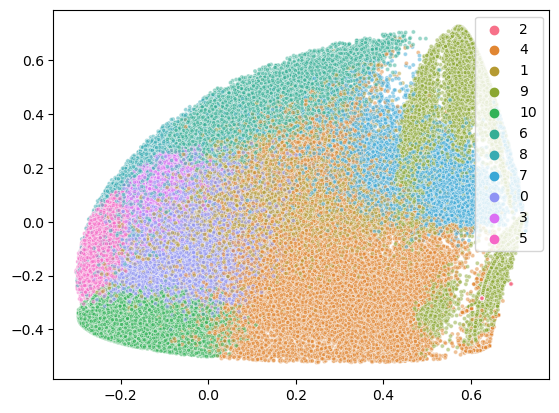

In [161]:
import seaborn as sns
sns.scatterplot(x=pca[:,0], y=pca[:,1], hue=labels.astype(str),alpha=0.5, marker='.')

In [162]:
rng = np.random.default_rng(0)
sample_indices = rng.choice(mat.shape[0],size=100000)

In [163]:
import umap
umap_emb = umap.UMAP(random_state=0).fit_transform(mat[sample_indices,:])

<Axes: >

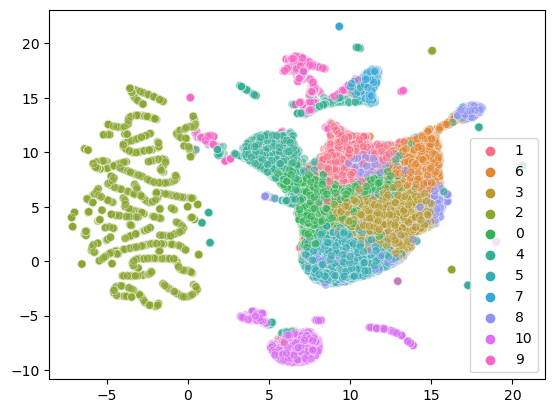

In [164]:
sns.scatterplot(x=umap_emb[:,0], y=umap_emb[:,1], hue=labels[sample_indices].astype(str),alpha=0.5)

In [132]:
gm.predict_proba(mat[5,:].reshape(1, -1))

array([[0.00000000e+000, 7.32019536e-152, 6.74280541e-066,
        0.00000000e+000, 1.00000000e+000, 1.48027094e-031,
        0.00000000e+000]])

In [137]:
gm.covariances_[0].shape

(9, 9)

In [118]:
gm

GaussianMixture(n_components=7, random_state=0)

<Axes: >

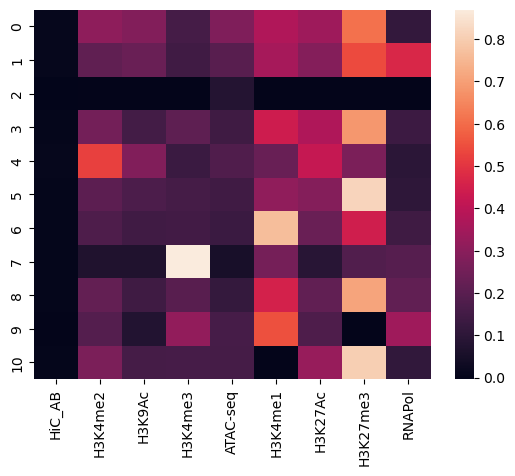

In [165]:
sns.heatmap(gm.means_,xticklabels=dat.columns[4:])

In [150]:
gm.precisions_cholesky_[0].shape

(9, 9)